# Machine Learning
**WARNING: PLEASE ENSURE YOU HAVE PROCESSED *ALL* DATA WITH `data_processing.ipynb` FIRST!**

Also, ensure files are placed into a `training` or a `test` folder.

## Categorization
Identify data in dataframes as either `cheater` or `innocent`.

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
import random
%matplotlib inline

In [268]:
# open all CSV files in folder
path = os.getcwd()
train_folder = "Useful Processed Data/training"
train_files = glob.glob(os.path.join(path, train_folder, "*.csv"))

In [272]:
# combine all training dataframes together
train_df = pd.DataFrame(dtype='float64')

for i, file in enumerate(train_files):
    data = pd.read_csv(file)
    train_df = pd.concat([train_df, data], axis=0)

columns_to_drop = ['index', 'Unnamed: 0']    

train_df.reset_index(inplace=True)

# fill null values with 0
train_df.fillna(0, inplace=True)

In [273]:
train_df

,index,Unnamed: 0,Time Since Start of Test,Mouse X Position,Mouse Y Position,Change in Time,Change in X,Change in Y,Horizontal Velocity,Vertical Velocity,...,Single Click,Point Click,Drag and Drop,Button.left,Button.middle,Button.right,FALSE,Button Pressed,File ID,Cheater
0,0,0,1.622368,-477,461,0.614353,57.0,-69.0,92.780508,-112.313246,...,0,0,0,0,0,0,0,0,2,1
1,1,1,2.236721,-420,392,0.504053,-32.0,-3.0,-63.485433,-5.951759,...,0,0,0,0,0,0,0,0,2,1
2,2,2,2.740774,-452,389,0.506402,71.0,-79.0,140.204813,-156.002539,...,0,1,0,0,0,0,0,0,2,1
3,3,3,3.247176,-381,310,0.315317,-2.0,-12.0,-6.342825,-38.056950,...,0,1,0,0,0,0,0,0,2,1
4,4,4,3.562493,-383,298,0.079174,0.0,0.0,0.000000,0.000000,...,1,1,0,1,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,358,358,549.311661,-693,1183,0.323228,99.0,-398.0,306.285684,-1231.330325,...,1,1,0,1,0,0,0,0,5,0
1065,359,359,549.634888,-594,785,0.503463,82.0,-98.0,162.872016,-194.651922,...,0,0,0,0,0,0,0,0,5,0
1066,360,360,550.138351,-512,687,0.488580,18.0,-152.0,36.841442,-311.105509,...,0,0,0,0,0,0,0,0,5,0
1067,361,361,550.626931,-494,535,0.081169,0.0,0.0,0.000000,0.000000,...,1,1,0,1,0,0,0,1,5,0


## Data Visualization

<AxesSubplot:xlabel='Mouse X Position', ylabel='Mouse Y Position'>

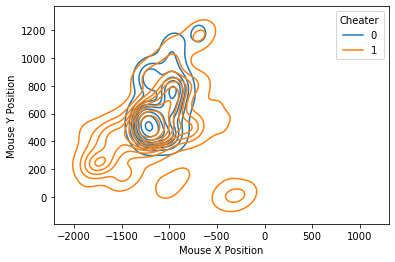

In [219]:
# Visualize where mouse was moved
sns.kdeplot(data=df, x='Mouse X Position', y='Mouse Y Position', fill=False, hue='Cheater')

<AxesSubplot:>

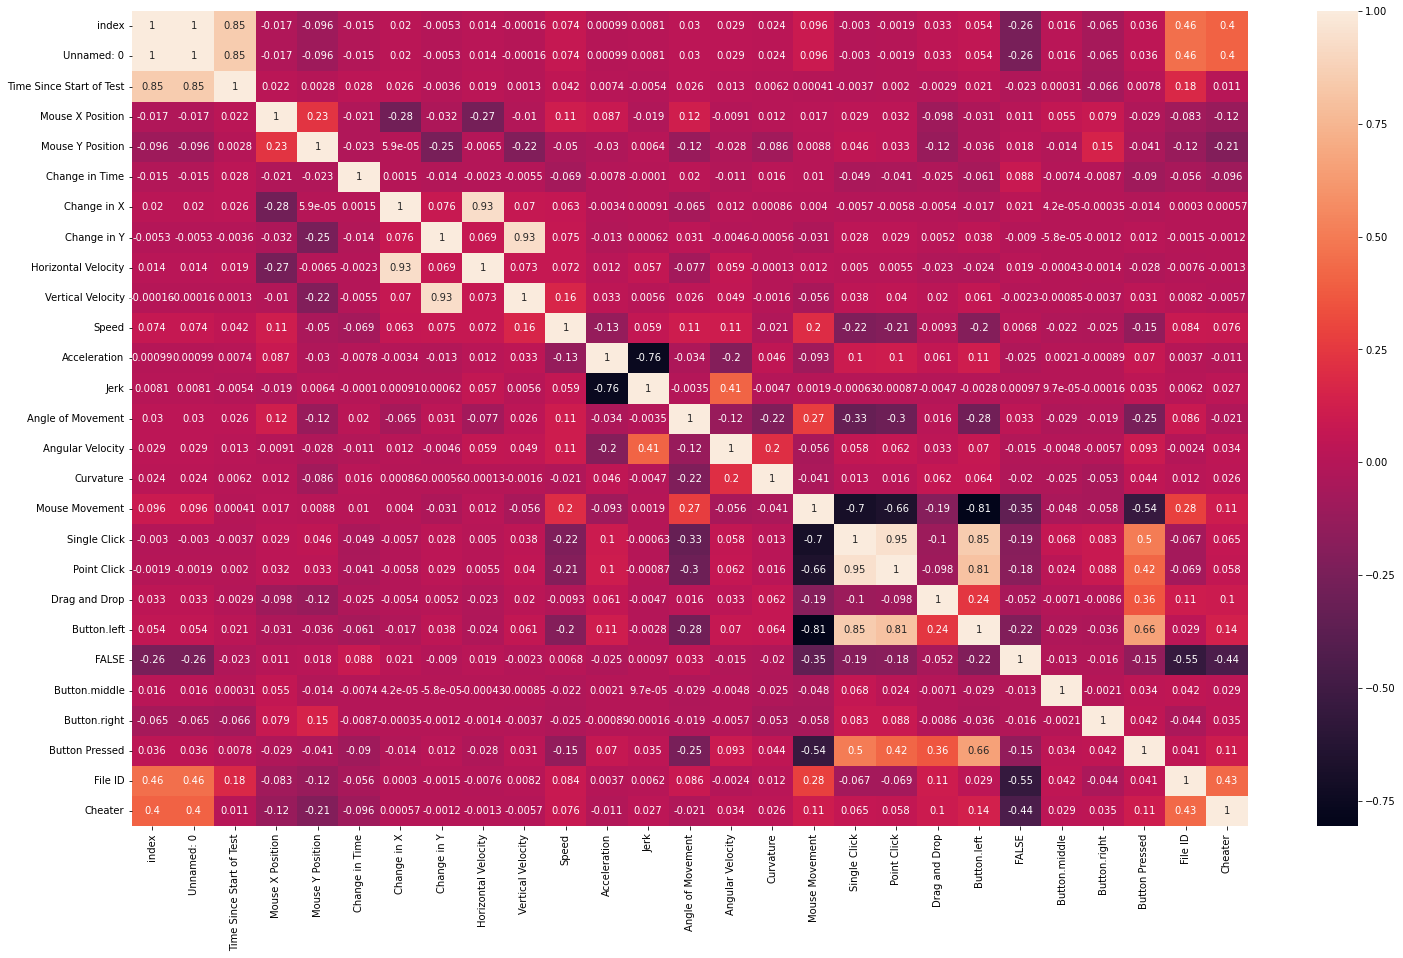

In [220]:
plt.figure(figsize=(25, 15)) #must be placed above sns in order to work in Jupyter
sns.heatmap(df.corr(), annot=True)

## Machine Learning
Using ML to predict if someone is cheating or not

In [274]:
column_to_predict = 'Cheater'

# UNDERSAMPLING
majority = df[df[column_to_predict] == 0]
minority = df[df[column_to_predict] == 1]

# grab random samples (as many as there are in minority class)
undersample = []
for i in minority[column_to_predict].values:
    undersample.append(majority.iloc[random.randint(0, len(majority)-1)])
undersample = pd.DataFrame(undersample)
undersampled_data = pd.concat([minority, undersample])

In [290]:
removed_features = [column_to_predict, 'Unnamed: 0']
removed_features.append('index')

In [291]:
## X are your inputs
X = undersampled_data.drop(removed_features, axis=1).values

## y is what you want to predict
y = undersampled_data[column_to_predict].values

In [292]:
## CROSS VALIDATION: split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=155)

In [293]:
# preprocessing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [294]:
## import machine learning library model library. Also sets variable equal to model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

## training and testing model
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.66      0.69      0.68       498
         1.0       0.70      0.67      0.69       534

    accuracy                           0.68      1032
   macro avg       0.68      0.68      0.68      1032
weighted avg       0.68      0.68      0.68      1032



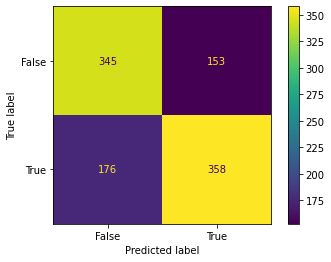

In [295]:
# EVALUATE MACHINE PERFORMANCE
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

print(classification_report(y_test, predictions))
print(ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=[False, True]))

In [296]:
removed_features.remove('index')

In [297]:
# predicts if user is cheater based on data
all_guesses = []


# open all CSV files in folder
path = os.getcwd()
test_folder = "Useful Processed Data/test"
test_files = glob.glob(os.path.join(path, test_folder, "*.csv"))

for i, file in enumerate(test_files):
    data = pd.read_csv(f"{file}")
    guesses = log_reg.predict(data.drop(removed_features, axis=1))
    count = 0
    for guess in guesses:
        count += guess
        
    percent_cheater = count / len(guesses)
    cheat_status = data['Cheater'][0]
        
    all_guesses.append((percent_cheater, count, cheat_status))

all_guesses = pd.DataFrame(all_guesses, columns=['Percent Cheater', 'Number of Cheating Instances', 'Cheating Status'])
all_guesses

C:\Users\92.89\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\92.89\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Percent Cheater,Number of Cheating Instances,Cheating Status
0,0.365639,83.0,0
1,0.527027,78.0,1


<AxesSubplot:xlabel='Cheating Status', ylabel='Percent Cheater'>

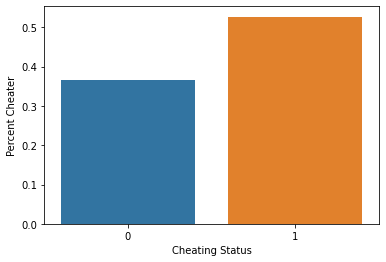

In [299]:
sns.barplot(data=all_guesses, y='Percent Cheater', x='Cheating Status')

### Random Forest
This model does surprisingly well. It has 100% accuracy. This could mean that it is overfit to the data or there is data leakage (however, I am not sure).

In [301]:
## import machine learning library model library. Also sets variable equal to model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

## training and testing model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       498
         1.0       1.00      1.00      1.00       534

    accuracy                           1.00      1032
   macro avg       1.00      1.00      1.00      1032
weighted avg       1.00      1.00      1.00      1032



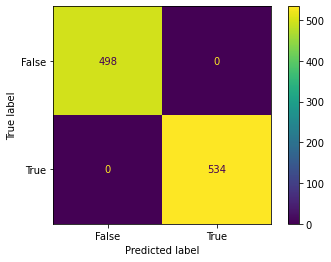

In [303]:
# EVALUATE MACHINE PERFORMANCE
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

print(classification_report(y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=[False, True]))

## Model Prediction
Test model on data in test folder.

In [325]:
def model_prediction(model, removed_features):
    # predicts if user is cheater. Uses test data
    all_guesses = []


    # open all CSV files in folder
    path = os.getcwd()
    test_folder = "Useful Processed Data/test"
    test_files = glob.glob(os.path.join(path, test_folder, "*.csv"))

    for i, file in enumerate(test_files):
        data = pd.read_csv(f"{file}")
        guesses = model.predict(data.drop(removed_features, axis=1))
        count = 0
        for guess in guesses:
            count += guess

        percent_cheater = count / len(guesses)
        cheat_status = data['Cheater'][0]

        all_guesses.append((percent_cheater, cheat_status, count))

    all_guesses = pd.DataFrame(all_guesses, columns=['Prediction',  'Actual Cheating Status', 'Number of Cheating Instances'])
    return all_guesses

In [326]:
# store guesses for models
log_reg_guesses = model_prediction(log_reg, removed_features)
clf_guesses = model_prediction(clf, removed_features)

C:\Users\92.89\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\92.89\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\92.89\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\92.89\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [332]:
log_reg_guesses

,Prediction,Actual Cheating Status,Number of Cheating Instances
0,0.365639,0,83.0
1,0.527027,1,78.0


<AxesSubplot:xlabel='Actual Cheating Status', ylabel='Prediction'>

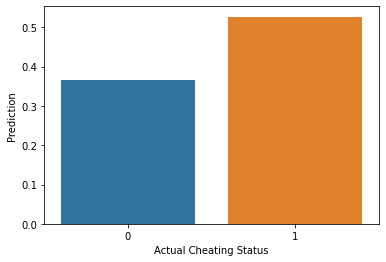

In [333]:
sns.barplot(data=log_reg_guesses, x='Actual Cheating Status', y='Prediction')

In [328]:
clf_guesses

,Prediction,Actual Cheating Status,Number of Cheating Instances
0,0.53304,0,121.0
1,1.00000,1,148.0


<AxesSubplot:xlabel='Actual Cheating Status', ylabel='Prediction'>

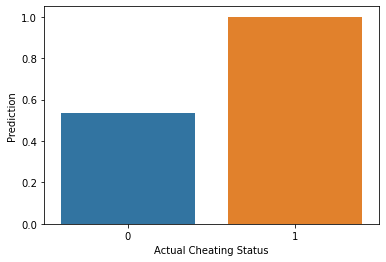

In [334]:
sns.barplot(data=clf_guesses, x='Actual Cheating Status', y='Prediction')